In [26]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso,Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor


# **EDA**

In [10]:
df = pd.read_csv('Melbourne_housing_FULL.csv')
df_copy = df.copy()
df_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [100]:
df_copy.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
34852,Yarraville,13 Burns St,4,h,1480000.00,PI,Jas,24/02/2018,6.30,3013.00,4.00,1.00,3.00,593.00,NaN,NaN,Maribyrnong City Council,-37.81,144.88,Western Metropolitan,6543.00
34853,Yarraville,29A Murray St,2,h,888000.00,SP,Sweeney,24/02/2018,6.30,3013.00,2.00,2.00,1.00,98.00,104.00,2018.00,Maribyrnong City Council,-37.82,144.89,Western Metropolitan,6543.00
34854,Yarraville,147A Severn St,2,t,705000.00,S,Jas,24/02/2018,6.30,3013.00,2.00,1.00,2.00,220.00,120.00,2000.00,Maribyrnong City Council,-37.82,144.88,Western Metropolitan,6543.00
34855,Yarraville,12/37 Stephen St,3,h,1140000.00,SP,hockingstuart,24/02/2018,6.30,3013.00,NaN,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.00
34856,Yarraville,3 Tarrengower St,2,h,1020000.00,PI,RW,24/02/2018,6.30,3013.00,2.00,1.00,0.00,250.00,103.00,1930.00,Maribyrnong City Council,-37.82,144.89,Western Metropolitan,6543.00


In [11]:
print(f'Shape     : {df_copy.shape}\n'
      f'Size      : {df_copy.size}\n'
      f'Dimension : {df_copy.ndim}')

Shape     : (34857, 21)
Size      : 731997
Dimension : 2


In [81]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [12]:
df_copy.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [83]:
df_copy.duplicated().sum()

1

In [84]:
df_copy.loc[df_copy.duplicated(keep=False), :]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15857,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.40,3131.00,3.00,3.00,2.00,405.00,226.00,2000.00,Manningham City Council,-37.83,145.17,Eastern Metropolitan,4973.00
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.40,3131.00,3.00,3.00,2.00,405.00,226.00,2000.00,Manningham City Council,-37.83,145.17,Eastern Metropolitan,4973.00


In [13]:
df_copy =df_copy.drop_duplicates()
df_copy.duplicated().sum()

0

In [86]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34856.00,3.03,0.97,1.00,2.00,3.00,4.00,16.00
Price,27247.00,1050173.34,641467.13,85000.00,635000.00,870000.00,1295000.00,11200000.00
Distance,34855.00,11.18,6.79,0.00,6.40,10.30,14.00,48.10
Postcode,34855.00,3116.06,109.03,3000.00,3051.00,3103.00,3156.00,3978.00
Bedroom2,26639.00,3.08,0.98,0.00,2.00,3.00,4.00,30.00
Bathroom,26630.00,1.62,0.72,0.00,1.00,2.00,2.00,12.00
Car,26128.00,1.73,1.01,0.00,1.00,2.00,2.00,26.00
Landsize,23046.00,593.61,3398.92,0.00,224.00,521.00,670.00,433014.00
BuildingArea,13741.00,160.25,401.28,0.00,102.00,136.00,188.00,44515.00
YearBuilt,15550.00,1965.29,37.33,1196.00,1940.00,1970.00,2000.00,2106.00


In [87]:
df.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [88]:
df_copy.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [36]:
df_copy.dtypes

Suburb             int64
Address           object
Rooms              int64
Type               int64
Price            float64
Method             int64
SellerG            int64
Date               int64
Distance           int64
Postcode           int64
Bedroom2           int64
Bathroom           int64
Car                int64
Landsize         float64
BuildingArea     float64
YearBuilt          int64
CouncilArea        int64
Lattitude        float64
Longtitude       float64
Regionname         int64
Propertycount      int64
dtype: object

In [37]:
cat_cols = []
num_cols = []

for i in df_copy.columns:
  if df_copy[i].nunique() <= 500:
    cat_cols.append(i)
  else:
    num_cols.append(i)

print("Categorical Columns",cat_cols)
print("Numerical Columns",num_cols)

Categorical Columns ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'YearBuilt', 'CouncilArea', 'Regionname', 'Propertycount']
Numerical Columns ['Address', 'Price', 'Landsize', 'BuildingArea', 'Lattitude', 'Longtitude']


In [38]:
print(pd.concat([df_copy.isnull().sum(), df_copy.isnull().sum()/len(df_copy)*100],
                 keys=['Number of Missing Values', 'Ratio of Missing Values'],
                 axis=1))

               Number of Missing Values  Ratio of Missing Values
Suburb                                0                      0.0
Address                               0                      0.0
Rooms                                 0                      0.0
Type                                  0                      0.0
Price                                 0                      0.0
Method                                0                      0.0
SellerG                               0                      0.0
Date                                  0                      0.0
Distance                              0                      0.0
Postcode                              0                      0.0
Bedroom2                              0                      0.0
Bathroom                              0                      0.0
Car                                   0                      0.0
Landsize                              0                      0.0
BuildingArea             

# **zscore**

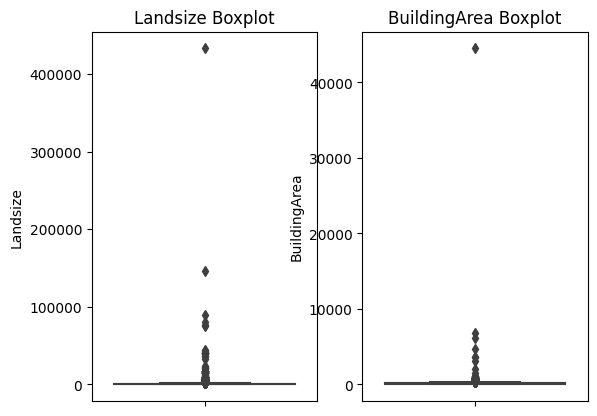

In [147]:
plt.subplot(1,2,1)
sns.boxplot(y="Landsize" , data=df_copy)
plt.title("Landsize Boxplot");

plt.subplot(1,2,2)
sns.boxplot(y="BuildingArea" , data=df_copy)
plt.title("BuildingArea Boxplot");


In [140]:
from scipy import stats
z_scores = np.abs(stats.zscore(df_copy[['Landsize', 'BuildingArea']]))
df_copy = df_copy[(z_scores < 3).all(axis=1)]

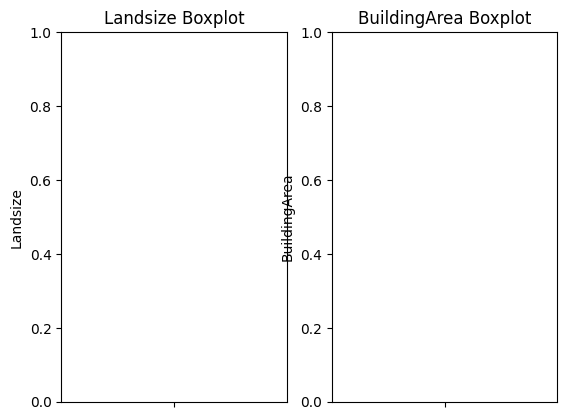

In [141]:
plt.subplot(1,2,1)
sns.boxplot(y="Landsize" , data=df_copy)
plt.title("Landsize Boxplot");

plt.subplot(1,2,2)
sns.boxplot(y="BuildingArea" , data=df_copy)
plt.title("BuildingArea Boxplot");

# **missing values**

In [14]:
df_copy.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7609
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [150]:
df_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.50,3067.00,2.00,1.00,1.00,126.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,2.00,1.00,1.00,202.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.50,3067.00,3.00,2.00,1.00,0.00,NaN,NaN,Yarra City Council,-37.81,145.01,Northern Metropolitan,4019.00
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00


In [162]:
print("Categorical Columns",cat_cols)
print("Numerical Columns",num_cols)

Categorical Columns ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Regionname', 'Propertycount']
Numerical Columns ['Address', 'Price', 'Landsize', 'Lattitude', 'Longtitude']


In [16]:
missing_values = ["Price","Distance","Landsize","Postcode","Bedroom2","Bathroom","Car","BuildingArea","CouncilArea","Regionname","YearBuilt","Lattitude","Longtitude","Propertycount"]
for i in missing_values:
  if i in cat_cols:
    mode_value = df_copy[i].mode().iloc[0]  #calculate mode
    df_copy[i].fillna(mode_value, inplace=True)
  else:
    mean_value = df_copy[i].mean() #calculate mean
    df_copy[i].fillna(mean_value, inplace=True)


In [17]:
df_copy.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

# **VISUALIZATION**

<ipython-input-18-d85ee75ecf73>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_copy.Price, bins=50, kde=False)


<Axes: xlabel='Price'>

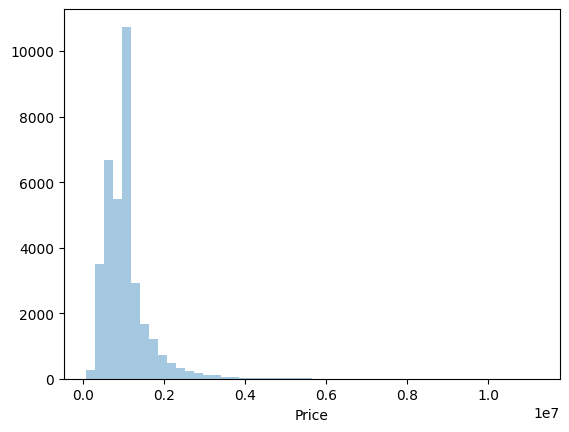

In [18]:
# Build a Histogram to visualize price distribution
sns.distplot(df_copy.Price, bins=50, kde=False)

<ipython-input-182-11782b93b00c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_copy.corr()


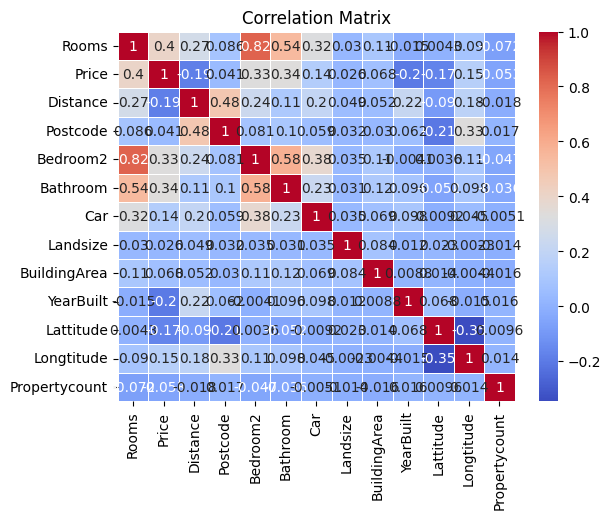

In [182]:
#Draw a correlation matrix by using a heatmap on seaborn
correlation_matrix = df_copy.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [20]:
#Implement Label Encoder and One Hot encoder for categorical variables
label_encoder = LabelEncoder()
for i in cat_cols:
  df_copy[i] = label_encoder.fit_transform(df_copy[i].values)

In [21]:
df_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,68 Studley St,1,0,1.050173e+06,6,155,58,13,53,...,1,1,126.0,160.251616,109,31,-37.8014,144.9958,2,184
1,0,85 Turner St,1,0,1.480000e+06,2,33,60,13,53,...,1,1,202.0,160.251616,109,31,-37.7996,144.9984,2,184
2,0,25 Bloomburg St,1,0,1.035000e+06,2,33,63,13,53,...,1,0,156.0,79.000000,40,31,-37.8079,144.9934,2,184
3,0,18/659 Victoria St,2,2,1.050173e+06,7,296,63,13,53,...,2,1,0.0,160.251616,109,31,-37.8114,145.0116,2,184
4,0,5 Charles St,2,0,1.465000e+06,5,33,64,13,53,...,2,0,134.0,150.000000,40,31,-37.8093,144.9944,2,184


In [40]:
# Since we are going to make a price estimation, we need to determine our x and y variables correctly.
#Splitting our data into train-test in order to increase the performance of model training
X = df_copy[['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']]
y = df_copy['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [32]:
models = {
    'Lasso': {
        'model': Lasso()
    },
    'LinearRegression': {
        'model': LinearRegression()
    },
    'Ridge': {
        'model': Ridge()
    },
    'ElasticNet': {
        'model': ElasticNet()
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor()
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor()
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor()
    },
    'AdaBoostRegressor': {
        'model': AdaBoostRegressor(n_estimators=5, learning_rate=1.2, loss='exponential', random_state=2)
    }
}

In [45]:
#Comparing models in each other
#Choose the best performing model by using evaluation metrics(MAE, MSE, RMSE,
#R2)

predictions = {}
for name, model in models.items():
    model = model['model']
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred

evaluation_metrics = {}
for name, y_pred in predictions.items():
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    evaluation_metrics[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

sorted_models = sorted(evaluation_metrics.items(), key=lambda x: x[1]['MSE'])
best_model = sorted_models[0]

for name, metrics in evaluation_metrics.items():
    print(f"Model: {name}")
    print(f"MAE: {metrics['MAE']}")
    print(f"MSE: {metrics['MSE']}")
    print(f"RMSE: {metrics['RMSE']}")
    print(f"R2: {metrics['R2']}")
    print("\n")

print("The Best Performing Model :")
print(f"Model: {best_model[0]}")
print(f"MAE: {best_model[1]['MAE']}")
print(f"MSE: {best_model[1]['MSE']}")
print(f"RMSE: {best_model[1]['RMSE']}")
print(f"R2: {best_model[1]['R2']}")


Model: Lasso
MAE: 316337.63216241775
MSE: 266967687971.25214
RMSE: 516689.15991266177
R2: 0.17545990755804552


Model: LinearRegression
MAE: 316337.7071149423
MSE: 266966410262.29263
RMSE: 516687.9234724696
R2: 0.17546385381188478


Model: Ridge
MAE: 316337.505552334
MSE: 266973326616.90985
RMSE: 516694.6164001613
R2: 0.17544249238152299


Model: ElasticNet
MAE: 319042.48971022153
MSE: 359272478039.6853
RMSE: 599393.425088802
R2: -0.1096270282963665


Model: KNeighborsRegressor
MAE: 308784.07851888443
MSE: 236911661397.4142
RMSE: 486735.72028094897
R2: 0.26828911515974907


Model: RandomForestRegressor
MAE: 278068.7306381863
MSE: 203229196919.5135
RMSE: 450809.4907158827
R2: 0.3723187173386905


Model: GradientBoostingRegressor
MAE: 286846.22148273885
MSE: 194059723636.64905
RMSE: 440522.10345980263
R2: 0.4006389923717919


Model: AdaBoostRegressor
MAE: 368713.24213736865
MSE: 258585281107.4896
RMSE: 508512.813120269
R2: 0.20134929732972873


The Best Performing Model :
Model: Gradient